# Load the Dataset

In [1]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('seattledata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

DATE
2005-01-01    261
2005-01-02    262
2005-01-03    264
2005-01-04    266
2005-01-05    268
Name: ETR, dtype: int64


<Figure size 640x480 with 1 Axes>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
%matplotlib inline

In [4]:
df = read_csv('seattledata.csv')

In [5]:
df.head()

,DATE,ETR
0,2005-01-01,261
1,2005-01-02,262
2,2005-01-03,264
3,2005-01-04,266
4,2005-01-05,268


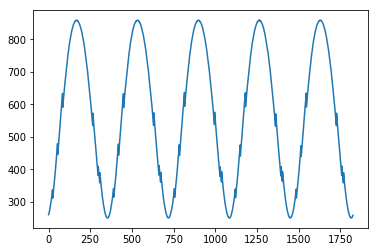

In [6]:
plt.plot(df['ETR'])

# Dickey-Fuller Stationarity Test

In [7]:
X = df['ETR'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0] < result[4]['5%']:
    print ("Reject Ho Null Hypothesis is Stationary")
else:
    print("Failed to reject Ho - Time Series is Non Stationary")


ADF Statistic: -6.177021
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho Null Hypothesis is Stationary


# ARIMA (1,0,1) Test

Test RMSE: 5.972
Test MAE: 3.878


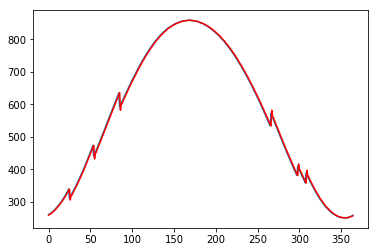

In [8]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('seattledata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
train, test = X[0:-365], X[-365:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [12]:
# fit model
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1461
Model:                     ARMA(1, 1)   Log Likelihood               -4691.481
Method:                       css-mle   S.D. of innovations              5.988
Date:                Fri, 19 Jun 2020   AIC                           9390.962
Time:                        21:25:38   BIC                           9412.109
Sample:                             0   HQIC                          9398.850
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        351.9835    189.615      1.856      0.064     -19.655     723.622
ar.L1.y        0.9994      0.001   1900.396      0.000       0.998       1.000
ma.L1.y        0.2205      0.022     10.161      0.0

# ARIMA (1,0,0) Test

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('seattledata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
train, test = X[0:-365], X[-365:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


Test RMSE: 6.183
Test MAE: 4.432


<Figure size 640x480 with 1 Axes>

In [2]:
# fit model
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1461
Model:                     ARMA(1, 0)   Log Likelihood               -4741.750
Method:                       css-mle   S.D. of innovations              6.198
Date:                Fri, 19 Jun 2020   AIC                           9489.501
Time:                        22:33:49   BIC                           9505.362
Sample:                             0   HQIC                          9495.417
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        336.7709    186.591      1.805      0.071     -28.941     702.483
ar.L1.y        0.9995      0.000   2379.734      0.000       0.999       1.000
                                    Roots           

# ARIMA (0,0,1) Test

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('seattledata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
train, test = X[0:-365], X[-365:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test RMSE: 107.200
Test MAE: 95.183


<Figure size 640x480 with 1 Axes>

In [3]:
# fit model
model = ARIMA(train, order=(0,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1461
Model:                     ARMA(0, 1)   Log Likelihood               -8903.860
Method:                       css-mle   S.D. of innovations            107.157
Date:                Fri, 19 Jun 2020   AIC                          17813.720
Time:                        22:34:04   BIC                          17829.581
Sample:                             0   HQIC                         17819.636
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        568.3491      5.552    102.363      0.000     557.467     579.231
ma.L1.y        0.9812      0.004    276.085      0.000       0.974       0.988
                                    Roots           

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from time import time
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('seattledata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
# solvers
solvers = ['lbfgs', 'bfgs', 'newton', 'nm', 'cg', 'ncg', 'powell']
scores = []
times = []
for solver in solvers:
    start_time = time()
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        # fit model
        model = ARIMA(history, order=(1,0,1))
        model_fit = model.fit(disp=False, solver=solver)
        # one step forecast
        yhat = model_fit.forecast()[0]
        # store forecast and ob
        predictions.append(yhat)
        history.append(test[t])
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    timing = time() - start_time
    scores.append(rmse)
    times.append(timing)
    print('Solver=%s, Test RMSE: %.3f, Test MAE: %.3f, Time=%f' % (solver, rmse, mae, timing))
# plot scores
ticks = [i for i in range(len(solvers))]
pyplot.bar(ticks, scores)
pyplot.xticks(ticks, solvers)
pyplot.show()
# plot times
ticks = [i for i in range(len(solvers))]
pyplot.bar(ticks, times)
pyplot.xticks(ticks, solvers)
pyplot.show()

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


            ETR
DATE           
2005-01-01  261
2005-01-02  262
2005-01-03  264
2005-01-04  266
2005-01-05  268
2005-01-06  270
2005-01-07  273
2005-01-08  275
2005-01-09  278
2005-01-10  281
2005-01-11  284
2005-01-12  287
2005-01-13  290
2005-01-14  293
2005-01-15  297
2005-01-16  300
2005-01-17  304
2005-01-18  308
2005-01-19  312
2005-01-20  316


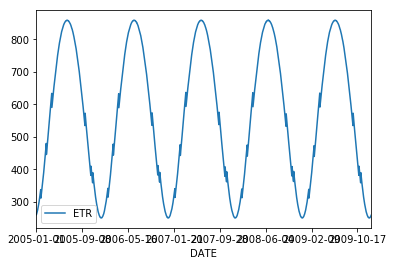

In [10]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('seattledata.csv', header=0, index_col=0)
# display first few rows
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()

In [11]:
# split the dataset
from pandas import read_csv
series = read_csv('seattledata.csv', header=0, index_col=0)
split_point = len(series) - 365
dataset, validation = series[0:split_point], series[split_point:]
print('Seattle Train %d, Seattle Test %d' % (len(dataset), len(validation)))
dataset.to_csv('seattletrain.csv', index=False)
validation.to_csv('seattletest.csv', index=False)

Seattle Train 1461, Seattle Test 365


# One-Step Out of Sample Forecast - ARIMA (1,0,1)

In [13]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [14]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# fit model
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit(disp=0)
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
print('Forecast: %f' % forecast)

Forecast: 259.175411


### Take-Aways
* This is the forecast for the first day in the test data set.
* The real value for this day, January 1st 2009, is 261.
* The model is very accurate with its predicted ETR value of 259.

# One-Step Out of Sample Forecast - ARIMA (1,0,0)

In [15]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [16]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# fit model
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit(disp=0)
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
print('Forecast: %f' % forecast)

Forecast: 259.035140


### Take-Aways
* Although the forecast is still close to the real value, ARIMA (1,0,1) did a fractionally better job of predicting the value.